## 깊이/너비 우선 탐색(DFS/BFS) > [퍼즐 조각 채우기](https://school.programmers.co.kr/learn/courses/30/lessons/84021)
(2024-04-01)

- 도형을 찾고, 이를 회전시키고, 게임보드에 존재하는 빈 공간에 넣는 과정을 모두 포함해야 함
- 이때 정확하게 일치하는 것뿐 아니라 포함될 수 있는 경우를 고려  
  - 상대적 위치를 고려해서 조정?

- 도형을 놓을 수 있는 자리보다 작은 도형을 놓는 경우를 고려해야 하는 식으로 서술됐으나, 실제로는 그렇지 않았음
- 괜히 헛고생...

In [84]:
piece = [[1,1,1],[1,0,0],[0,0,0]]
piece

[[1, 1, 1], [1, 0, 0], [0, 0, 0]]

In [85]:
# 위아래로 뒤집은 결과
piece[::-1]

[[0, 0, 0], [1, 0, 0], [1, 1, 1]]

In [89]:
# 위아래로 뒤집은 결과 -> 열 idx를 기준으로 정렬 
# : 오른쪽으로 90도 회전한 결과
list(zip(*piece[::-1]))

[(0, 1, 1), (0, 0, 1), (0, 0, 1)]

In [87]:
[list(row) for row in zip(*piece[::-1])]

[[0, 1, 1], [0, 0, 1], [0, 0, 1]]

In [35]:
[(0,1), (1,0)] in [(1,0), (0,1)]

False

In [1]:
from collections import deque

def get_piece(table, target):
    """
    게임 보드에서 빈 공간(0) 또는 테이블에서 조각(1)을 찾아 리스트로 반환합니다.
    - BFS(너비 우선 탐색)를 사용하여 연결된 모든 부분을 찾습니다.
    - table: 게임 보드 또는 테이블의 2차원 배열
    - target: 찾고자 하는 대상(0 또는 1)
    """
    piece_map = []  # 찾은 조각들을 저장할 리스트
    n = len(table)  # 테이블의 길이(가로 또는 세로, 정사각형 가정)
    for y in range(n):
        for x in range(n):
            if table[y][x] == target:  # 조각 또는 빈 공간의 시작점 발견
                table[y][x] = 1 - target  # 방문한 곳은 상태를 반전시켜 중복 방문 방지
                piece = [[y, x]]  # 현재 조각의 좌표를 저장하는 리스트
                queue = deque([[y, x]])  # BFS를 위한 큐
                while queue:
                    py, px = queue.popleft()  # 큐에서 하나의 원소를 꺼냄
                    for dy, dx in [[0, 1], [0, -1], [1, 0], [-1, 0]]:  # 상하좌우 탐색
                        ny, nx = py + dy, px + dx  # 새로운 위치
                        if 0 <= ny < n and 0 <= nx < n and table[ny][nx] == target:
                            table[ny][nx] = 1 - target  # 방문 처리
                            queue.append([ny, nx])  # 큐에 추가
                            piece.append([ny, nx])  # 현재 조각에 좌표 추가
                piece_map.append(piece)  # 완성된 조각을 조각 목록에 추가
    return piece_map

def regularization(piece):
    """
    조각을 정규화하여, 회전하거나 뒤집어도 항상 동일한 형태로 비교할 수 있게 합니다.
    - 조각의 최소 x, y 좌표를 기준으로 재배치하여 모든 조각을 원점에 맞춥니다.
    """
    min_y, min_x = map(min, zip(*piece))  # 조각의 최소 y, x 좌표
    max_y, max_x = map(max, zip(*piece))  # 조각의 최대 y, x 좌표
    r_piece = [[0] * (max_x - min_x + 1) for _ in range(max_y - min_y + 1)]  # 정규화된 조각의 크기에 맞는 빈 리스트 생성
    for y, x in piece:
        r_piece[y - min_y][x - min_x] = 1  # 원점에 맞춰 조각 재배치
    return r_piece

def rotate(piece):
    """
    조각을 시계 방향으로 90도 회전합니다.
    - zip 함수와 리스트 컴프리헨션을 사용해 구현합니다.
    """
    return [list(row) for row in zip(*piece[::-1])]

def match(blank_dict, piece_dict):
    """
    게임 보드의 빈 공간과 테이블의 조각들을 매칭시켜, 매칭된 조각의 크기의 합을 반환합니다.
    - 각 빈 공간과 조각을 회전시키며 매칭을 시도합니다.
    """
    cnt = 0  # 매칭된 조각의 크기의 합
    for b_idx, blanks in list(blank_dict.items()):
        pieces = piece_dict.get(b_idx, [])  # 같은 크기의 조각 목록 가져오기
        for blank in blanks:
            matched = False  # 매칭 여부
            for i, piece in enumerate(pieces):
                for _ in range(4):  # 조각을 4번 회전시키며 매칭 시도
                    if blank == piece:  # 매칭되면
                        cnt += b_idx  # 매칭된 조각의 크기를 합산
                        pieces.pop(i)  # 매칭된 조각을 목록에서 제거
                        matched = True  # 매칭됨을 표시
                        break  # 더 이상의 회전 시도 중지
                    piece = rotate(piece)  # 조각 회전
                if matched:
                    break  # 다음 빈 공간으로 넘어감
    return cnt

def solution(game_board, table):
    """
    주어진 게임 보드와 테이블을 바탕으로 빈 공간을 채울 수 있는 조각들을 매칭하고,
    총 매칭된 조각의 크기를 계산하여 반환합니다.
    """
    piece_dict = {}  # 테이블의 조각을 크기별로 분류하여 저장
    for p in get_piece(table, 1):  # 테이블에서 조각 찾기
        r_piece = regularization(p)  # 조각 정규화
        piece_dict.setdefault(len(p), []).append(r_piece)  # 조각을 크기별로 분류하여 저장
    
    blank_dict = {}  # 게임 보드의 빈 공간을 크기별로 분류하여 저장
    for b in get_piece(game_board, 0):  # 게임 보드에서 빈 공간 찾기
        b_piece = regularization(b)  # 빈 공간 정규화
        blank_dict.setdefault(len(b), []).append(b_piece)  # 빈 공간을 크기별로 분류하여 저장
    
    return match(blank_dict, piece_dict)  # 매칭된 조각의 크기의 합 반환


In [2]:
game_board = [[0,1],[0,0]]
table = [[1,0],[1,0]]
solution(game_board, table)

0

In [3]:
game_board = [[1,0],[1,1]]
table = [[1,0],[1,0]]
solution(game_board, table)

0

In [95]:
game_board = [[1,1,0,0,1,0],[0,0,1,0,1,0],[0,1,1,0,0,1],[1,1,0,1,1,1],[1,0,0,0,1,0],[0,1,1,1,0,0]]
table = [[1,0,0,1,1,0],[1,0,1,0,1,0],[0,1,1,0,1,1],[0,0,1,0,0,0],[1,1,0,1,1,0],[0,1,0,0,0,0]]
solution(game_board, table)

14

In [96]:
game_board = [[0,0,0],[1,1,0],[1,1,1]]
table = [[1,1,1],[1,0,0],[0,0,0]]
solution(game_board, table)

0

## 2024 KAKAO WINTER INTERNSHIP > [가장 많이 받은 선물](https://school.programmers.co.kr/learn/courses/30/lessons/258712)
(2024-04-02)

In [4]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
[column for column in zip(*matrix)]

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]

In [19]:
def solution(friends, gifts):
    friend_keys = {}
    for idx, friend in enumerate(friends):
        friend_keys[friend] = idx
    
    n = len(friends)
    fromto = [[0] * n for _ in range(n)]
    for gift in gifts :
        from_f, to_f = gift.split()
        fromto[friend_keys[from_f]][friend_keys[to_f]] += 1
        
    nextMonth = [0] * n
    plus_factors = [sum(column) for column in fromto]
    minus_factors = [sum(column) for column in zip(*fromto)]
    scores = [x-y for x, y in zip(plus_factors, minus_factors)]
    for i in range(n):
        for j in range(n):            
            if i == j:
                continue
            if fromto[i][j] > fromto[j][i]:
                nextMonth[i] += 1
            elif fromto[i][j] < fromto[j][i]:
                nextMonth[j] += 1
            else :
                i_score = scores[i]
                j_score = scores[j]
                if i_score == j_score:
                    continue
                elif i_score > j_score:
                    nextMonth[i] += 1
                else :
                    nextMonth[j] += 1
    
    answer = max(nextMonth) // 2

    return answer

In [20]:
friends = ["joy", "brad", "alessandro", "conan", "david"]
gifts = ["alessandro brad", "alessandro joy", "alessandro conan", "david alessandro", "alessandro david"]
solution(friends, gifts)

4

## PCCP 기출문제 > [PCCP 기출문제] 1번 / 붕대 감기
(2024-04-02)

In [27]:
def solution(bandage, health, attacks):
    t, x, y = bandage
    hp = health
    before = 0
    for attack in attacks:
        timing, damage = attack        
        if hp < health:
            duration = timing-before-1 # 피격받은 순간 제외
            heal_amount = duration*x if duration < t else duration*x + (duration//t)*y            
            hp = min(health, hp+heal_amount)
        hp -= damage
        before = timing
        if hp <= 0:
            return -1
    return hp

In [28]:
bandage = [3, 2, 7]
health = 20	
attacks = [[1, 15], [5, 16], [8, 6]]
solution(bandage, health, attacks)

Time:1, HP:5
Time:5, HP:2
Time:8, HP:0


-1

## PCCE 기출문제 > [PCCE 기출문제] 9번 / [이웃한 칸](https://school.programmers.co.kr/learn/courses/30/lessons/250125)
(24-04-02)

### BFS/DFS 응용
- 정확히는 기초 구현

In [10]:
def solution(board, h, w):

    directions = [(1,0), (0,1), (-1,0), (0,-1)]
    
    n = len(board)
    history = [[0]*n for _ in range(n)]
    
    color = board[h][w]
    history[h][w] = 1
    answer = 0

    for dx, dy in directions:
        nx, ny = h+dx, w+dy
        if 0 <= nx < n and 0 <= ny < n and history[nx][ny]==0 and board[nx][ny] == color:
            history[nx][ny] = 1
            answer += 1
    
    return answer

In [11]:
board = [["blue", "red", "orange", "red"], ["red", "red", "blue", "orange"], ["blue", "orange", "red", "red"], ["orange", "orange", "red", "blue"]]
h = 1
w = 1
solution(board, h, w)

2

## [PCCE 기출문제] 10번 > [데이터 분석](https://school.programmers.co.kr/learn/courses/30/lessons/250121)
(24-04-02)

In [ ]:
def solution(data, ext, val_ext, sort_by):
    columns = ['code', 'date', 'maximum', 'remain']
    data = [x for x in data if x[columns.index(ext)] < val_ext]
    return sorted(data, key=lambda x : x[columns.index(sort_by)])

## [달리기 경주](https://school.programmers.co.kr/learn/courses/30/lessons/178871)
(24.04.02)

- 불리는 과정에 따라 가장 간단하게 slicing 후 재조합

- 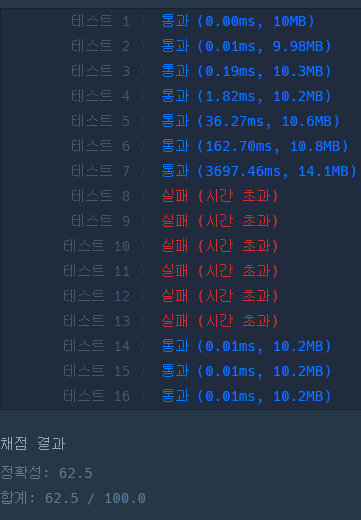

In [ ]:
def solution(players, callings):
    for calling in callings :
        idx = players.index(calling)
        players = players[:idx-1] + [calling] + [players[idx-1]] + players[idx+1:]
    return players

- 불리는 과정을 점수로 처리해서 적용하면 어떨까?

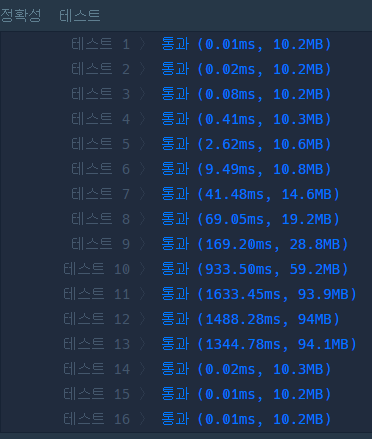

In [33]:
def solution(players, callings):
    players.reverse()
    answer = {idx:p for idx, p in enumerate(players)}
    scores = {p:idx for idx, p in enumerate(players)}

    for calling in callings :
        scores[calling] += 1
        before = answer[scores[calling]]
        scores[before] -= 1
        answer[scores[calling]] = calling
        answer[scores[before]] = before
    answer = list(answer.values())
    answer.reverse()
    return answer

- 좀 더 간소화된 버전 : 하나의 dictionary만 사용
- answer dict를 사용하는 것 대신 player의 idx를 이용해 직접 값 변경

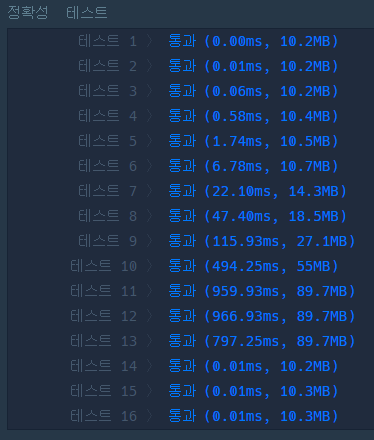

In [39]:
def solution(players, callings):
    player_idx = {p: idx for idx, p in enumerate(players)}
    for calling in callings :
        idx = player_idx[calling]
        players[idx] = players[idx-1]
        player_idx[players[idx]] = idx
        
        players[idx-1] = calling
        player_idx[players[idx-1]] = idx-1
    return players

In [40]:
players = ["mumu", "soe", "poe", "kai", "mine"]	
callings = ["kai", "kai", "mine", "mine"]
solution(players, callings)

['mumu', 'kai', 'mine', 'soe', 'poe']

## [추억 점수](https://school.programmers.co.kr/learn/courses/30/lessons/176963)

In [13]:
def solution(name, yearning, photo):
    length_gap = len(name) - len(yearning)
    yearning += length_gap*[0]
    scores = dict(zip(name, yearning))
    answers = []
    for p in photo:
        answer = 0
        for i in p:
            answer += scores[i] if i in name else 0
        answers.append(answer)
    return answers

In [14]:
name = ["may", "kein", "kain", "radi"]
yearning = [5, 10, 1, 3]
photo = [["may", "kein", "kain", "radi"],["may", "kein", "brin", "deny"], ["kon", "kain", "may", "coni"]]

solution(name, yearning, photo)

[19, 15, 6]